### QUESTIONS
1. first N word distributions
2. check how many captions are letter-space-letter pattern (e.g. "f u t u r e", "c o o l" ... etc.)

In [9]:
import os
import json
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
JSON_DATA = '../ig_json/mid_clean_wonumber.json'

with open(JSON_DATA, 'r') as f:
    data = json.load(f)

captions = []
for id_dict in data['images']:
    tokens = id_dict['sentences'][0]['tokens']
    captions.append(tokens)
    
print(len(captions))

122200


### 1. First N Words Distribution

In [22]:
def show_ngram_freq(captions, n = 1, top_k = 10, verbose = True):
    ngram_counter = Counter()
    for tokens in captions:
        ngram = tuple(tokens[:n])
        ngram_counter.update([ngram])

    ngram_counter = [(k, v) for k, v in ngram_counter.items()]
    ngram_counter = sorted(ngram_counter, key = lambda x: x[1], reverse = True)
    
    outs = []
    for i, (ngram, freq) in enumerate(ngram_counter):
        if i == top_k:
            break
        if verbose:
            print(f'{ngram} ({freq})')
        outs.append((ngram, freq))
    return outs

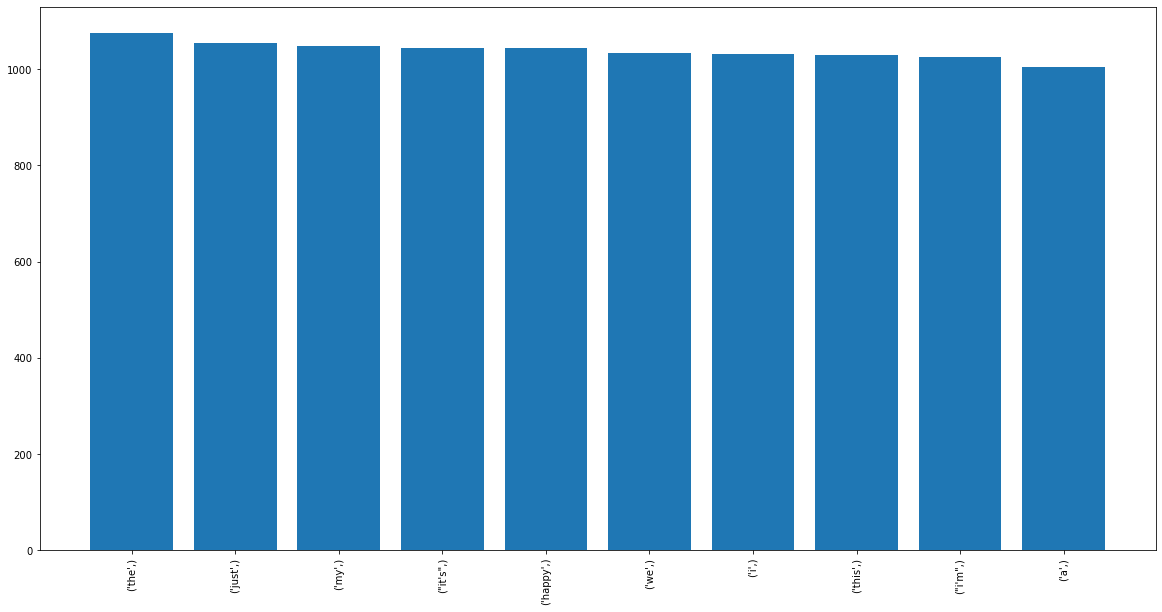

In [23]:
outs = show_ngram_freq(captions, n = 1, top_k = 10, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 90);

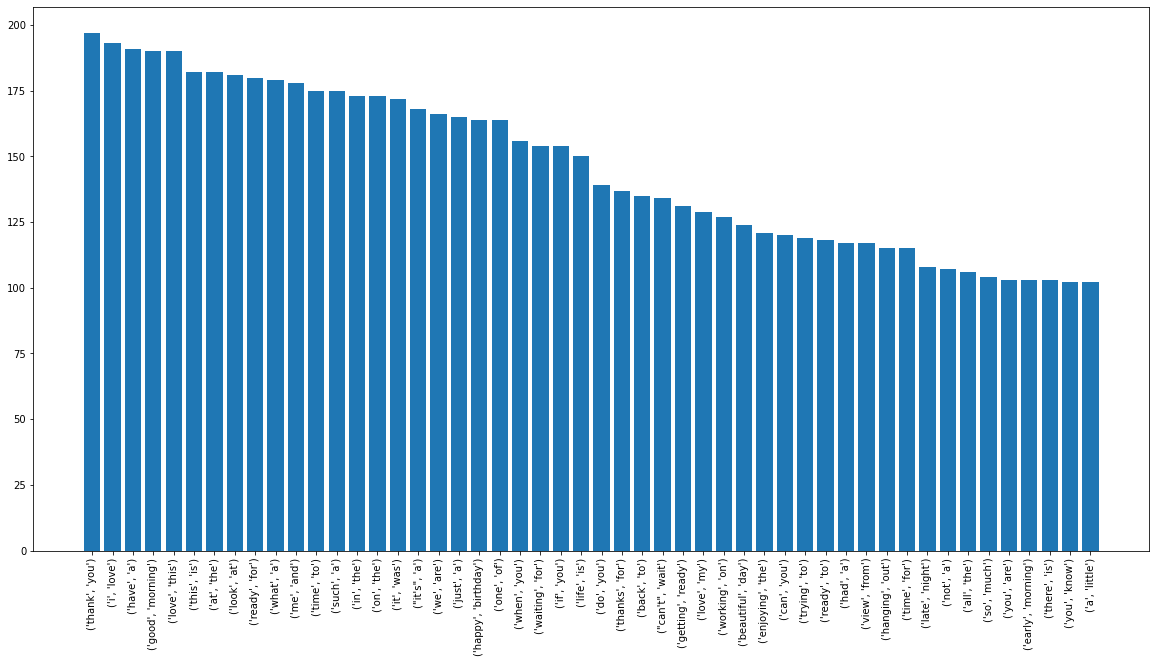

In [24]:
outs = show_ngram_freq(captions, n = 2, top_k = 50, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 90);

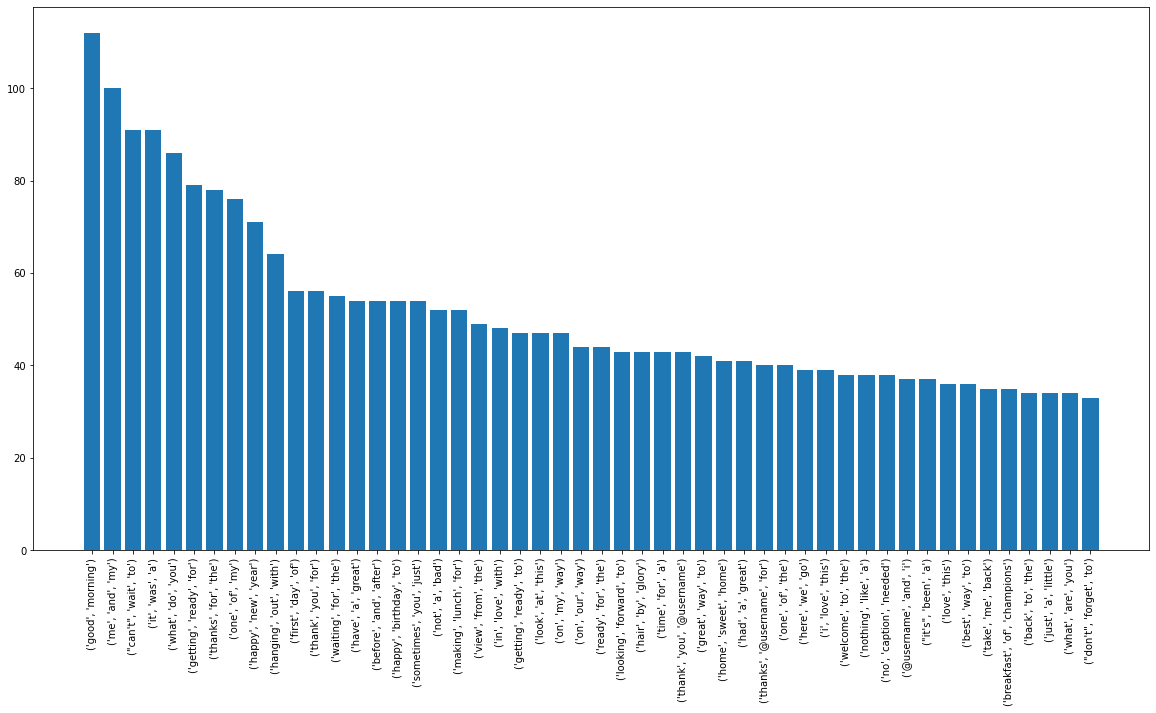

In [25]:
outs = show_ngram_freq(captions, n = 3, top_k = 50, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 90);

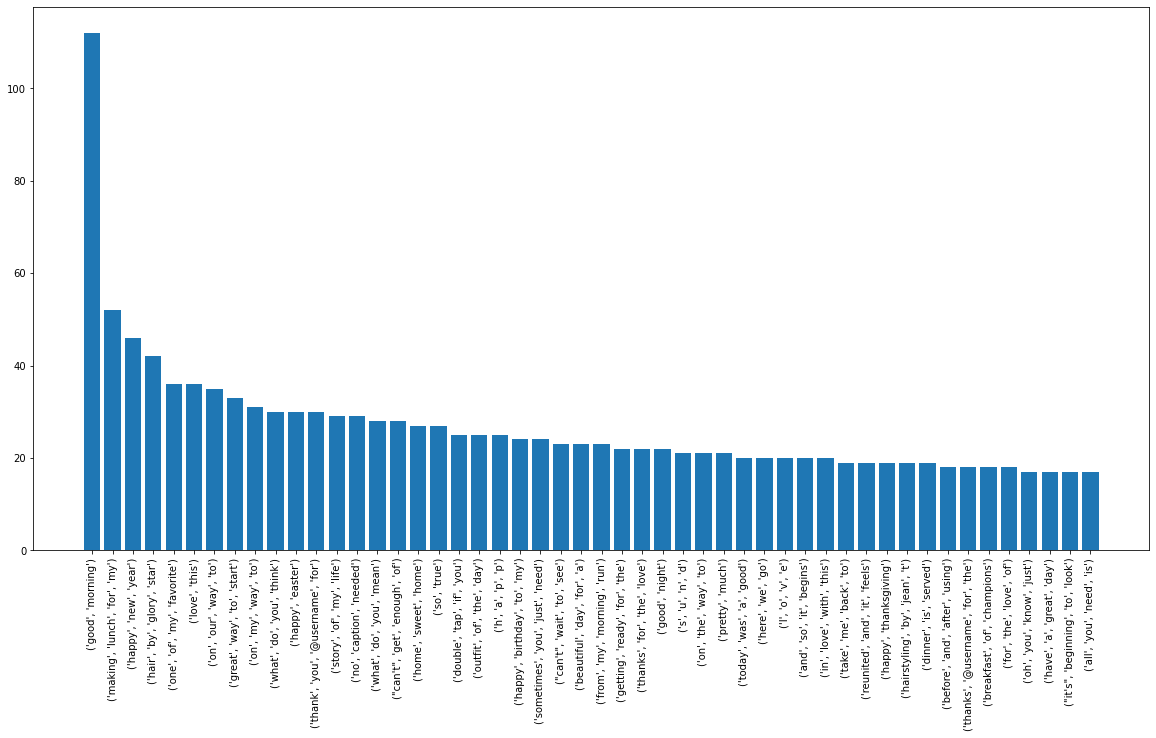

In [26]:
outs = show_ngram_freq(captions, n = 4, top_k = 50, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 90);

### 2. Check Character Space Caption (e.g. "f u t u r e")

In [37]:
special_captions = []

for c in captions:
    if len(c) <= 2:
        continue
    c_len = [len(token) for token in c]
    if all([token_len == 1 for token_len in c_len]):
        if all([token.isalpha() for token in c]):
            special_captions.append(c)
        
print(len(special_captions))

771


In [38]:
special_captions

[['g', 'u', 'a', 'v', 'a'],
 ['s', 'u', 'n', 'd', 'a', 'y', 'n', 'i', 'g', 'h', 't'],
 ['d', 'e', 't', 'a', 'i', 'l', 's'],
 ['c', 'r', 'a', 'v', 'i', 'n', 'g', 't', 'h', 'i', 's'],
 ['d', 'e', 't', 'a', 'i', 'l', 's'],
 ['c', 'a', 't', 's'],
 ['h', 'o', 'm', 'e', 's', 'w', 'e', 'e', 't', 'h', 'o', 'm', 'e'],
 ['k', 'a', 'n', 'y', 'e', 'w', 'e', 's', 't'],
 ['b', 'a', 'l', 'a', 'y', 'a', 'g', 'e'],
 ['m', 'a', 'r', 'k', 'g', 'o', 'n', 'z', 'a', 'l', 'e', 's'],
 ['b', 'e', 'a', 'c', 'h', 'b', 'i', 't', 'c', 'h'],
 ['w', 'h', 'i', 't', 'e'],
 ['s', 'e', 'r', 'e', 'n', 'i', 't', 'y'],
 ['t', 'a', 't', 'i', 'n'],
 ['f', 'a', 's', 't', 'f', 'o', 'o', 'd'],
 ['p', 'e', 'r', 'f', 'e', 'c', 't'],
 ['l', 'o', 'v', 'e', 'l', 'i', 'n', 'e'],
 ['w', 'a', 't', 'e', 'r', 'm', 'e', 'l', 'o', 'n'],
 ['r', 'e', 'l', 'a', 'x'],
 ['g', 'r', 'e', 'e', 'c', 'e'],
 ['b', 'l', 'o', 'n', 'd', 'e', 'b', 'a', 'l', 'a', 'y', 'a', 'g', 'e'],
 ['b', 'a', 'l', 'a', 'y', 'a', 'g', 'e'],
 ['h', 'a', 'i', 'r', 'p', 'a